# Monte Carlo simulation of a Harmonic Oscillator system at NVT

## Initializations

Imports:

In [1]:
%matplotlib inline
#%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import pint
import matplotlib.pyplot as plt
import numpy as np

Standard Units:

In [2]:
rng = np.random.default_rng()
ureg = pint.UnitRegistry(auto_reduce_dimensions=True)
ureg.setup_matplotlib()
meter = ureg.meter
second = ureg.second
kilo = ureg.kilogram
Kel = ureg.kelvin
joule = ureg.joule

<Unit('joule')>

Global Constants:

In [3]:
#system constants
k = 20 * kilo/second**2
m = 20 * kilo #actually in amu
kb = 8313 * kilo * meter**2 / second**2 / Kel #actually kb/n where n is the conversion factor between amu and kg

#simulation conditions
dx = 10 * meter
cycles = 100000
nparts = 100
Ti = 300 * Kel
Tf = 300 * Kel
nbins = 15

15

## Definitions

In [4]:
#returns potential energy from position
def potentialE(pos):
    PE = k / 2 * pos**2
    return PE

## Simulations

Metropolis Algorithm Monte Carlo Simulation:

In [5]:
#Initialize the arrays that will store the data
Pos = np.zeros(nparts) * meter

#Set initial values for the arrays and local variables
scf = np.sqrt(kb * Ti / m)
for i in range(nparts):
    Pos[i] = 2 * scf * np.sqrt(m / k) * (rng.random() - 0.5)
iPos = Pos.copy()

#MC loop
for i in range(cycles):
    #select random particle
    o = int(rng.random() * nparts)
    #calculate initial energy
    eni = potentialE(Pos[o])
    #calculate new position energy
    npos = Pos[o] + (rng.random() - 0.5)*dx
    enf = potentialE(npos)
    #decide to keep the new position or not
    if rng.random() < np.exp(-1 / kb / Tf * (enf - eni)): Pos[o] = npos

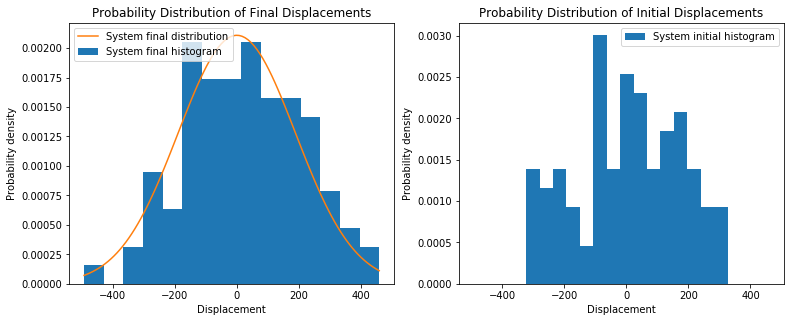

In [7]:
ps = np.linspace(np.amin(Pos), np.amax(Pos), 100)

fig, aa = plt.subplots(1, 2, sharey=False, sharex=True, figsize=(6.4 * 2,4.8))
aa[0].hist(Pos, bins=nbins, density=True, label='System final histogram')
aa[0].plot(ps, (1 / 2 / np.pi)**0.5 / np.std(Pos) * np.exp(-1 / 2 * ps**2 / np.std(Pos)**2), label='System final distribution')
aa[1].hist(iPos, bins=nbins, density=True, label='System initial histogram')

plt.setp(aa[:], xlabel='Displacement', ylabel='Probability density')
aa[0].set_title('Probability Distribution of Final Displacements')
aa[1].set_title('Probability Distribution of Initial Displacements')
aa[0].legend()
aa[1].legend()